# A Deep Dive into Data Visualization with Seaborn
A tutorial on creating powerful and informative data visualizations using the Seaborn library in Python. Seaborn is a high-level interface built on top of Matplotlib that makes it easier to create statistically attractive and informative graphics.

We will explore several fundamental plot types that are essential for exploratory data analysis (EDA). For each plot, we will provide an introduction, explain its primary use cases, and break down the key parameters of the Seaborn function used to create it.

**Dataset:** We will primarily use the `tips` and `iris` datasets, which are conveniently included with the Seaborn library.

In [5]:
%pip uninstall numpy scipy seaborn -y
%pip install numpy
%pip install scipy
%pip install seaborn


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: scipy 1.12.0
Uninstalling scipy-1.12.0:
  Successfully uninstalled scipy-1.12.0
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.


  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gpy 1.13.2 requires scipy<=1.12.0,>=1.3.0, which is not installed.
gpyopt 1.2.6 requires scipy>=0.16, which is not installed.
paramz 0.9.6 requires scipy, which is not installed.
scikit-learn 1.6.1 requires scipy>=1.6.0, which is not installed.
gpy 1.13.2 requires numpy<2.0.0,>=1.7, but you have numpy 2.2.6 which is incompatible.
evogym 2.0.0 requires numpy<2.0.0, but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
    --------------------------------------- 0.5/41.3 MB 2.4 MB/s eta 0:00:17
   - -------------------------------------- 1.0/41.3 MB 2.4 MB/s eta 0:00:17
   - -------------------------------------- 1.3/41.3 MB 2.0 MB/s eta 0:00:20
   - -------------------------------------- 1.6/41.3 MB 2.0 MB/s eta 0:00:20
   -- ------------------------------------- 2.1/41.3 MB 2.0 MB/s eta 0:00:20
   -- ------------------------------------- 2.4/41.3 MB 2.0 MB/s eta 0:00:20
   -- ------------------------------------- 2.9/41.3 MB 2.0 MB/s eta 0:00:20
   --- ------------------------------------ 3.4/41.3 MB 2.1 MB/s eta 0:00:19
   ---- ----------------------------------- 4.2/41.3 MB 2.2 MB/s eta 0:00:17
   ---- ----------------------------------- 4.7/41.3 MB 2.3 MB/s eta 0:00:17
   ----- ---------------------------------- 5.2/41.3 MB 2.3 MB/s eta 0:00:16
   ----- ----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gpy 1.13.2 requires numpy<2.0.0,>=1.7, but you have numpy 2.2.6 which is incompatible.
gpy 1.13.2 requires scipy<=1.12.0,>=1.3.0, but you have scipy 1.15.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Set the style for the plots
sns.set_theme(style="ticks")

# Load the example datasets
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

print("Tips Dataset Head:")
print(tips.head())
print("\nIris Dataset Head:")
print(iris.head())

Tips Dataset Head:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Iris Dataset Head:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Section 1: Pair Plots (`pairplot`)

A pair plot is an incredibly useful tool for visualizing the relationships between multiple variables in a dataset at once. It creates a grid of axes such that each numeric variable in the data is shared across the y-axes on a single row and the x-axes on a single column. The diagonal plots show the univariate distribution of each variable, while the off-diagonal plots show the bivariate relationship between each pair of variables.

**When to use it:** Pair plots are ideal during the initial phase of exploratory data analysis (EDA). They provide a quick and comprehensive overview of your data, helping you to spot potential correlations, identify clusters, and understand the distribution of each feature.

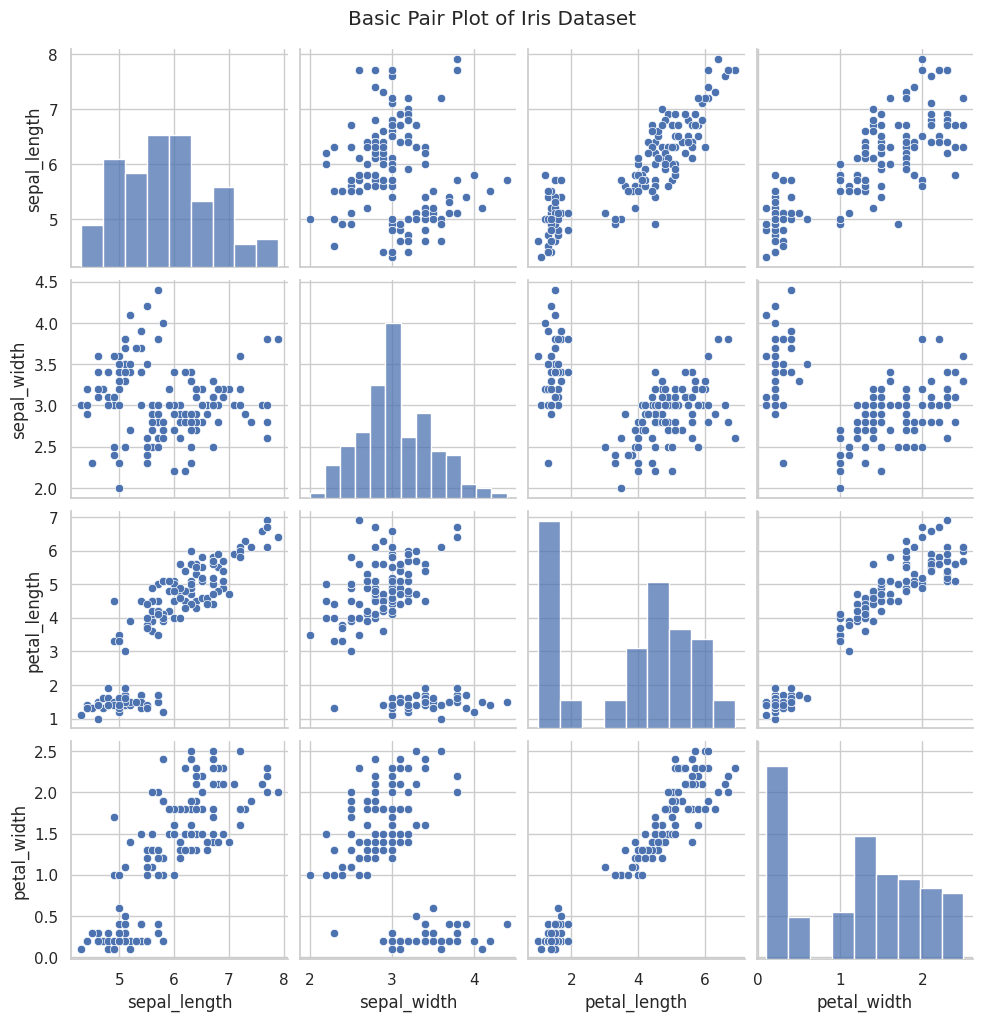

In [3]:
# Create a basic pair plot using the iris dataset
sns.pairplot(iris)
plt.suptitle("Basic Pair Plot of Iris Dataset", y=1.02) # Adjust title position
plt.show()

### Customizing Pair Plots

The real power of `pairplot` comes from its customization options. Let's explore some of the most important parameters.

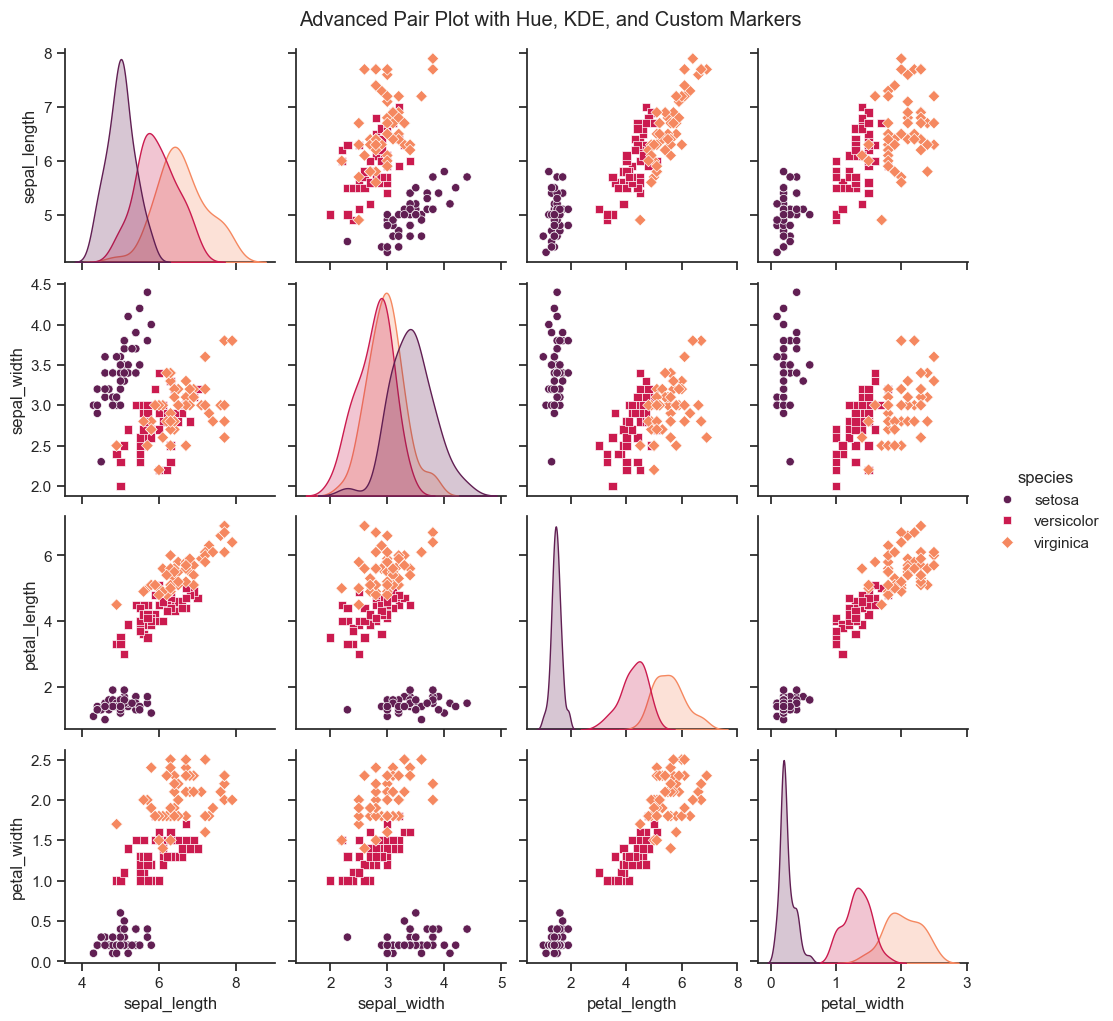

In [4]:
# A more advanced pair plot with parameter explanations
sns.pairplot(
    data=iris,         # The dataset to use.
    hue="species",     # Parameter Explanation:
                       # `hue` is used to color data points based on a categorical variable.
                       # This is the most powerful parameter for pair plots as it helps to see
                       # if different categories form distinct clusters or follow different trends.
                       # Here, we can see how the different species of iris are separated.

    palette="rocket", # Parameter Explanation:
                       # `palette` controls the color scheme used for the `hue` variable.
                       # Options include names of matplotlib colormaps ('viridis', 'rocket', 'plasma'),
                       # a list of colors, or a dictionary mapping hue levels to colors.
                       # 'viridis' is a perceptually uniform colormap, good for accessibility.

    diag_kind="kde",   # Parameter Explanation:
                       # `diag_kind` determines the kind of plot to use for the diagonal subplots.
                       # The default is 'auto', which chooses between 'hist' and 'kde'.
                       # Options:
                       # - 'hist': Shows a histogram of the variable.
                       # - 'kde': Shows a Kernel Density Estimate plot, which is a smoothed version of a histogram.
                       # We use 'kde' here for a smoother representation of the distribution.

    kind="scatter",    # Parameter Explanation:
                       # `kind` determines the kind of plot to use for the off-diagonal subplots.
                       # Options:
                       # - 'scatter': The default, a standard scatter plot.
                       # - 'reg': A scatter plot with a linear regression model fit.
                       # - 'kde': A 2D KDE plot.
                       # - 'hist': A 2D histogram.

    markers=["o", "s", "D"] # Parameter Explanation:
                       # `markers` allows you to use different marker styles for each level of the `hue` variable.
                       # This adds another layer of visual distinction. The list should have the same
                       # number of markers as there are unique values in the `hue` column.
                       # 'o' is circle, 's' is square, 'D' is diamond.
)
plt.suptitle("Advanced Pair Plot with Hue, KDE, and Custom Markers", y=1.02)
plt.show()

### Case Study: Preliminary Machine Learning Feature Exploration

**Scenario:** A machine learning engineer is tasked with building a model to classify iris flowers based on their measurements. Before building any complex models, they need to understand the data.

**Action:** The engineer runs `sns.pairplot(iris, hue='species')`.

**Insight:** The resulting plot immediately provides critical insights. They can see that the `setosa` species (one of the colors) is linearly separable from the other two species based on `petal_length` and `petal_width`. The `versicolor` and `virginica` species are more overlapping, but still show clear differences in their distributions. This suggests that even a simple model could perform well, and it highlights which features are most important for the classification task.

## Section 2: Factor Plots (now `catplot`)

What was once known as `factorplot` has been redesigned and renamed to `catplot` (Categorical Plot) in modern versions of Seaborn. It is a figure-level function that provides a unified interface for creating various plots that show the relationship between a numerical variable and one or more categorical variables.

**When to use it:** Use `catplot` whenever you want to compare distributions across different categories. For example, comparing the total bill for smokers vs. non-smokers, or for different days of the week. Its strength lies in the ability to easily create faceted plots (subplots for different categories).

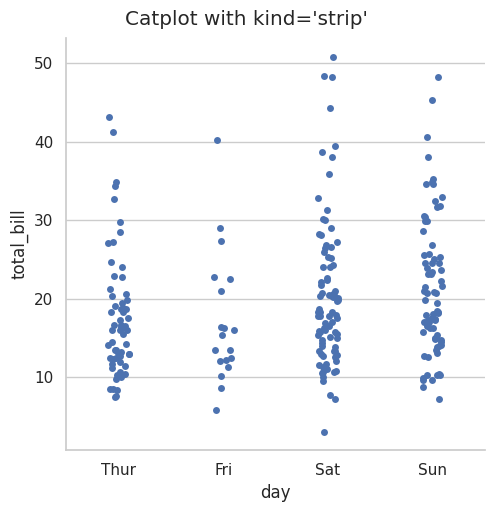

In [5]:
# Using catplot to create a strip plot
sns.catplot(
    data=tips,
    x="day",          # The categorical variable on the x-axis.
    y="total_bill",   # The numerical variable on the y-axis.
    kind="strip"      # Parameter Explanation:
                      # `kind` is the most important parameter for `catplot`. It specifies which underlying
                      # axes-level function to use. The default is 'strip'.
                      # Options for `kind` include:
                      # - Categorical scatter plots: 'strip', 'swarm'
                      # - Categorical distribution plots: 'box', 'violin', 'boxen'
                      # - Categorical estimate plots: 'point', 'bar', 'count'
)
plt.suptitle("Catplot with kind='strip'", y=1.02)
plt.show()

In [ ]:
sns.catplot(data=tips, x="smoker", y="total_bill", kind="strip")
plt.suptitle("Catplot with kind='box'", y=1.02)
plt.show()
# - Categorical scatter plots: 'strip', 'swarm'
                      # - Categorical distribution plots: 'box', 'violin', 'boxen'
                      # - Categorical estimate plots: 'point', 'bar', 'count'

NameError: name 'sns' is not defined

### Exploring Different `kinds` in `catplot`

Let's see how changing the `kind` parameter can give us different insights. We will also introduce faceting with the `col` parameter.

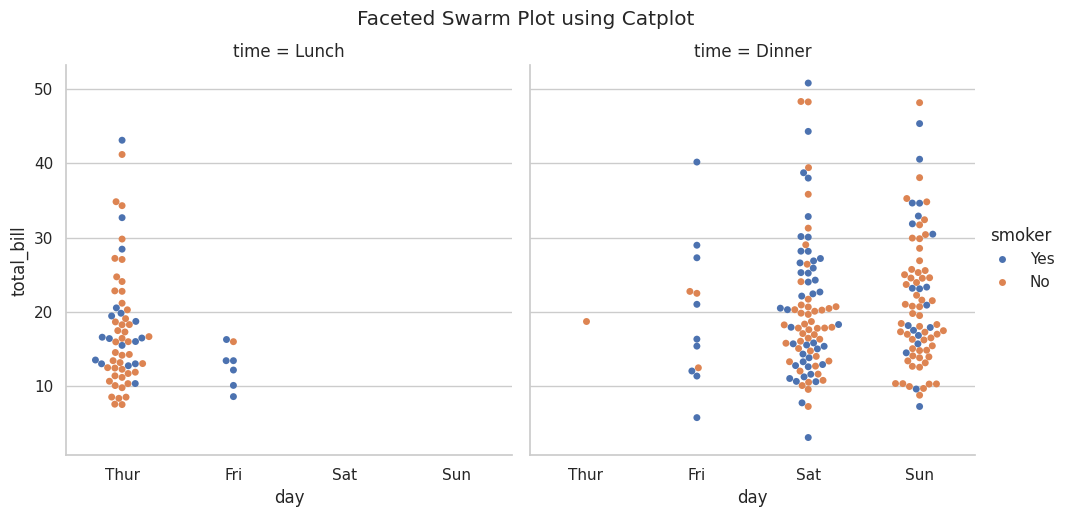

In [6]:
# Using catplot to create a swarm plot, faceted by time
sns.catplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="smoker",     # Parameter Explanation:
                      # `hue` works just like in pairplot, adding another categorical dimension with color.

    col="time",       # Parameter Explanation:
                      # `col` is used to create subplots (facets) based on the levels of a categorical variable.
                      # The plot is split into columns for each unique value in the 'time' column ('Lunch', 'Dinner').
                      # You can also use `row` to facet by rows.

    kind="swarm"      # Parameter Explanation:
                      # `kind='swarm'` is similar to a strip plot, but it adjusts the points along the categorical
                      # axis to avoid overlap. This gives a better representation of the distribution of values.
                      # Warning: It does not scale well to very large datasets.
)
plt.suptitle("Faceted Swarm Plot using Catplot", y=1.03)
plt.show()

### Case Study: Optimizing Restaurant Staffing

**Scenario:** A restaurant manager wants to analyze customer traffic and spending habits to create a more efficient staffing schedule.

**Action:** The manager uses `sns.catplot(data=tips, x='day', col='time', kind='count')`. This creates two bar plots (one for 'Lunch', one for 'Dinner') showing the number of customers served each day.

**Insight:** The plots clearly show that the weekend (Saturday and Sunday) is busiest, especially for dinner. Thursday lunch is busier than Friday lunch. This data-driven insight allows the manager to schedule more staff during peak hours and reduce staff during quieter periods, optimizing labor costs.

## Section 3: Histograms (`histplot`)

A histogram is a classic visualization tool that represents the distribution of a single numerical variable. It works by dividing the entire range of values into a series of intervals—or “bins”—and then counts how many values fall into each bin. While you can create a histogram with `catplot(kind='count')` on a binned variable, the more direct and powerful way in Seaborn is to use `histplot` or the figure-level `displot(kind='hist')`.

**When to use it:** Use a histogram whenever you want to understand the underlying frequency distribution of a dataset. It helps you see where the data is concentrated, if it's skewed, and if there are outliers.

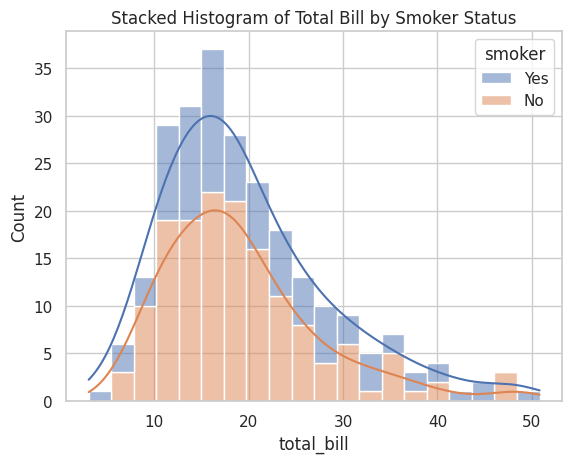

In [7]:
# Creating a histogram with a Kernel Density Estimate (KDE)
sns.histplot(
    data=tips,
    x="total_bill",  # The variable whose distribution we want to see.
    bins=20,         # Parameter Explanation:
                     # `bins` controls the number of intervals the data is divided into.
                     # Choosing the right number of bins is crucial. Too few can hide patterns;
                     # too many can create noise. 'auto' is the default, but specifying an integer
                     # gives you more control. We chose 20 here for a reasonably detailed view.

    kde=True,        # Parameter Explanation:
                     # `kde=True` overlays a Kernel Density Estimate on the histogram.
                     # This smoothed line can help to more clearly visualize the shape of the distribution.
                     # The default is `False`.

    hue="smoker",    # Parameter Explanation:
                     # `hue` can be used to create separate, overlapping histograms for different categories.
                     # Here, we can compare the distribution of total bills for smokers and non-smokers.

    multiple="stack" # Parameter Explanation:
                     # `multiple` controls how the bars for different `hue` levels are displayed.
                     # Options:
                     # - 'layer': The default. Bars are semi-transparent and drawn on top of each other.
                     # - 'stack': Bars are stacked on top of one another.
                     # - 'dodge': Bars are placed side-by-side.
                     # - 'fill': Bars are normalized to show proportions.
)
plt.title("Stacked Histogram of Total Bill by Smoker Status")
plt.show()

### Case Study: Understanding Exam Score Distributions

**Scenario:** A university professor wants to understand the performance of students on a final exam.

**Action:** The professor collects the scores and plots them using `sns.histplot(data=exam_scores, x='score', bins=15, kde=True)`.

**Insight:** The histogram reveals the overall performance. A right-skewed distribution indicates an easy exam where most students scored high. A left-skewed distribution indicates a difficult exam. A bimodal distribution (two peaks) might suggest that there are two distinct groups of students in the class, perhaps those who studied and those who didn't, which could prompt the professor to investigate their teaching methods.

## Section 4: Violin Plots (`violinplot`)

A violin plot is a sophisticated visualization that combines the features of a box plot and a kernel density plot. The "violin" shape shows the distribution of the data (similar to a KDE plot), and within each violin, a mini box plot (or just lines) can be shown to display summary statistics like the median and interquartile range.

**When to use it:** Use a violin plot when you want to visualize both the distribution and the summary statistics of a numerical variable across different categories. They are particularly useful for revealing the structure of your data, such as whether a distribution is bimodal (has two peaks), which is something a standard box plot cannot show.

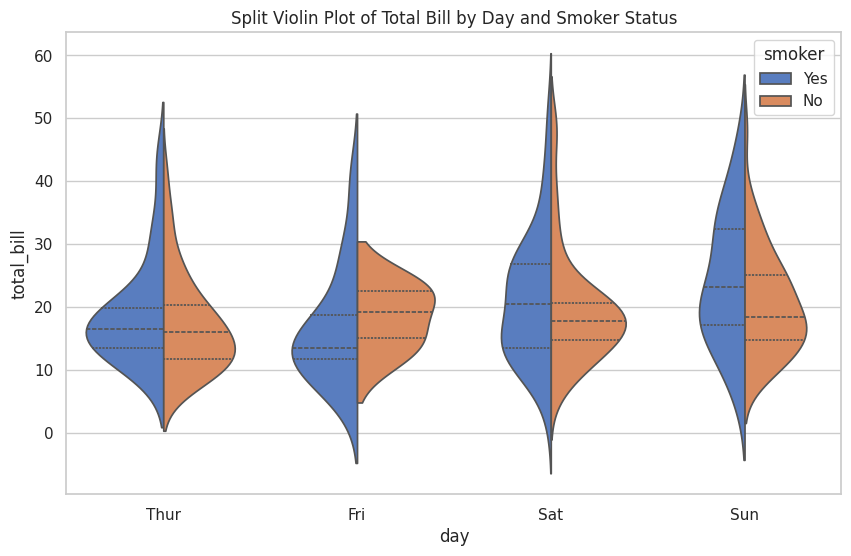

In [8]:
# A violin plot can be created directly with violinplot() or with catplot(kind='violin')
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="smoker",

    split=True,       # Parameter Explanation:
                      # `split=True` is used when the `hue` variable has exactly two levels.
                      # It draws half of a violin for each level, allowing for a more direct comparison.
                      # This saves space and makes differences more apparent.
                      # The default is `False`.

    inner="quart",    # Parameter Explanation:
                      # `inner` controls the representation of data points inside the violins.
                      # Options:
                      # - 'box': Draws a miniature box plot.
                      # - 'quart': Shows the quartiles (25th, 50th, 75th percentiles).
                      # - 'point' or 'stick': Shows the individual observations.
                      # - None: Draws an unadorned violin.
                      # 'quart' is a good choice for a clean look at the key statistical points.

    palette="muted"   # Parameter Explanation:
                      # `palette` works just as in other plots to control the color scheme.
                      # 'muted' is one of Seaborn's default color palettes.
)
plt.title("Split Violin Plot of Total Bill by Day and Smoker Status")
plt.show()

### Case Study: Comparing Product Review Ratings

**Scenario:** An e-commerce analyst wants to compare customer satisfaction for two competing products, Product A and Product B.

**Action:** The analyst gathers all the 1-to-5 star ratings for both products and plots them using `sns.violinplot(data=reviews, x='product_name', y='rating')`. A standard box plot would also work, but a violin plot provides more detail.

**Insight:** The violin plot might show that while both products have the same average rating (the median line is in the same place), Product A has a bimodal distribution, with many 5-star and many 1-star reviews. Product B has a normal distribution centered around 3.5 stars. This suggests Product A is a polarizing "love it or hate it" product, while Product B is more consistently average. This is a crucial distinction for marketing and product development that a simple box plot would miss.

### Combining Plots

For even deeper insights, you can overlay different plot types. For example, let's combine a violin plot with a swarm plot to see both the distribution shape and the individual data points.

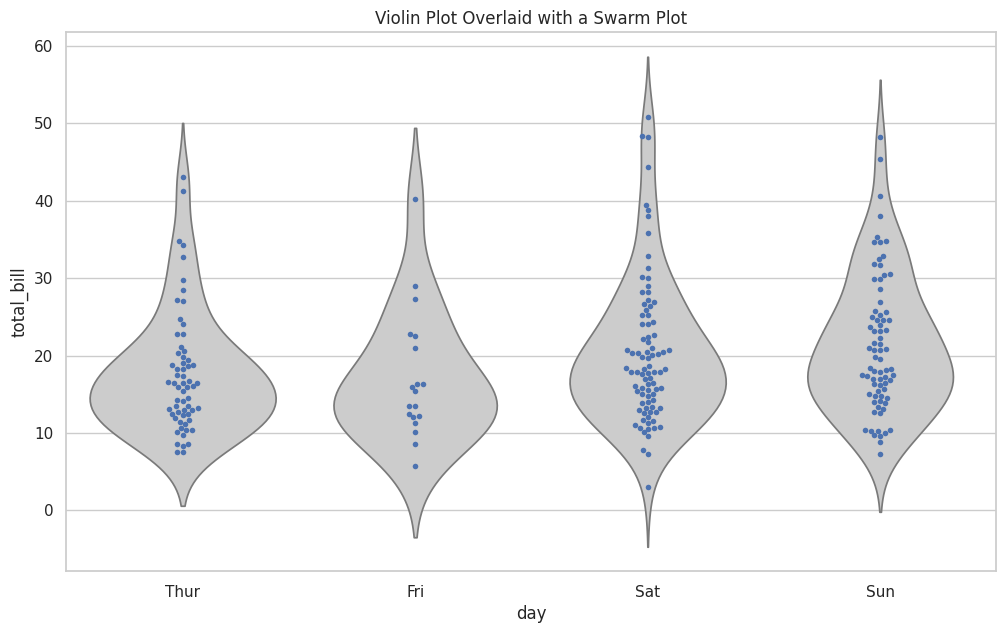

In [9]:
plt.figure(figsize=(12, 7))

# First, draw the violin plot
sns.violinplot(data=tips, x="day", y="total_bill", inner=None, color=".8")

# Second, overlay a swarm plot
sns.swarmplot(data=tips, x="day", y="total_bill", size=4)

plt.title("Violin Plot Overlaid with a Swarm Plot")
plt.show()

## Section 5: Exercises

Use the `tips` and `iris` datasets to complete the following challenges.

### Exercise 1: Pair Plot Exploration

Using the `tips` dataset, create a `pairplot` to explore the relationships between `total_bill`, `tip`, and `size`. Color the points by the `smoker` status. What initial observations can you make about the spending and tipping habits of smokers vs. non-smokers?

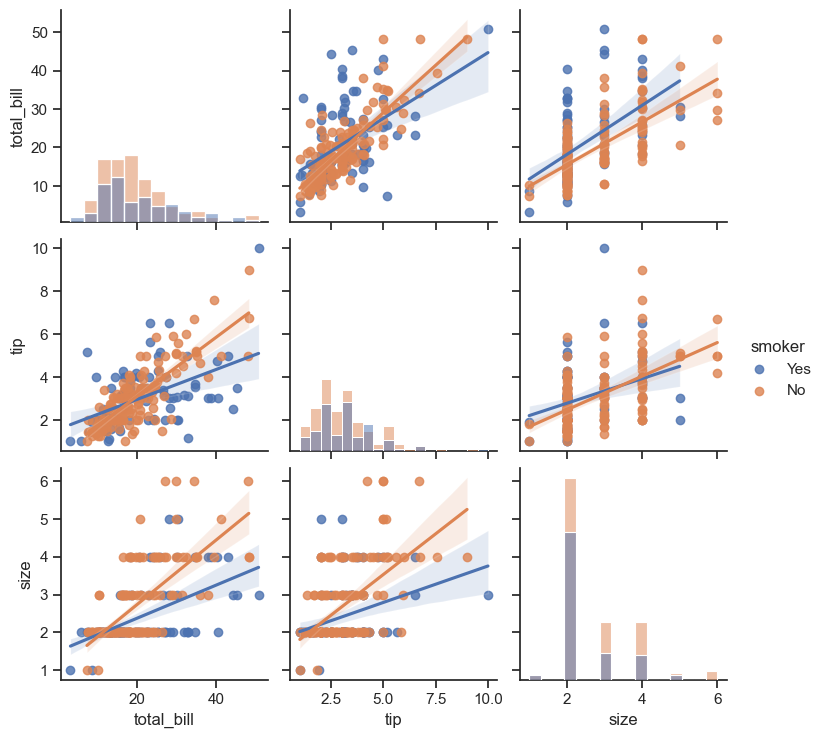

In [8]:
# Your code for Exercise 1 here
tips= sns.load_dataset("tips")
sns.pairplot(data=tips,hue='smoker',diag_kind='hist',kind='reg')

### Exercise 2: Categorical Box Plot

Create a `catplot` of `kind='box'` to show the distribution of `tip` for each `day` of the week. Use the `hue` parameter to also separate by `sex`. Is there a noticeable difference in tipping habits between males and females on different days?

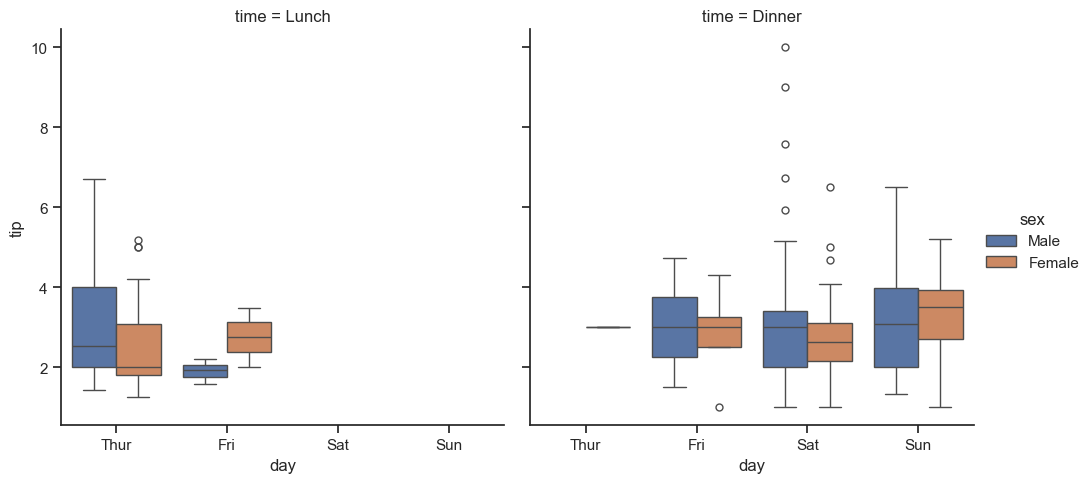

In [14]:
# Your code for Exercise 2 here
sns.catplot(data=tips,x='day',y='tip',kind='box',hue='sex', col='time')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Exercise 3: Overlapping Histograms

Generate a `histplot` for the `sepal_width` from the `iris` dataset. Use the `hue` parameter to show the distributions for each `species`. Use `multiple='layer'` to see the overlapping distributions, and set `kde=True` to add density curves. Which species tends to have the largest sepal width?

<Axes: xlabel='sepal_width', ylabel='Count'>

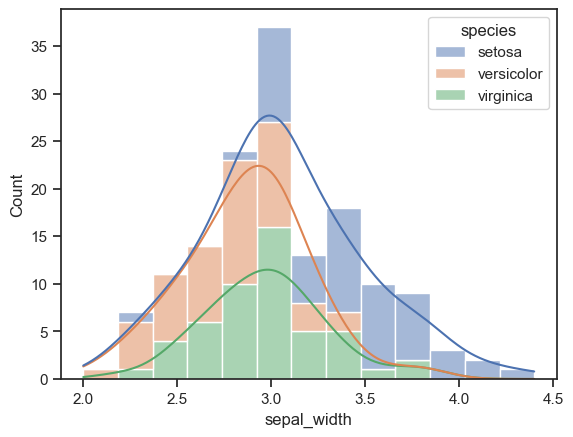

In [19]:
# Your code for Exercise 3 here
sns.histplot(data=iris,x='sepal_width',hue='species',multiple='stack',kde=True)

### Exercise 4: Comparing Distributions with a Violin Plot

Create a `violinplot` to compare the `total_bill` distribution between lunch and dinner (`time`). Within the violins, show the quartiles (`inner='quart'`). What can you say about the spending patterns during lunch vs. dinner based on the plot?

<Axes: xlabel='total_bill', ylabel='time'>

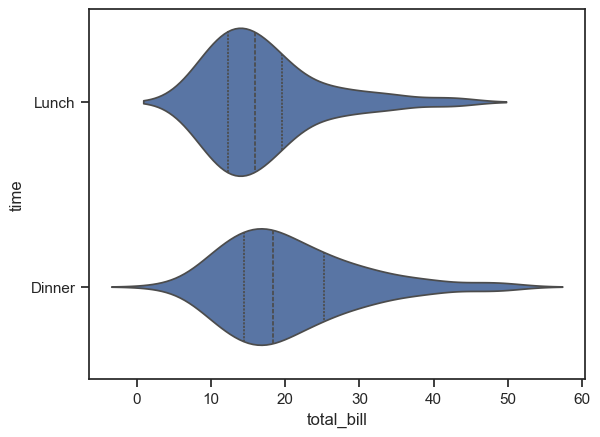

In [21]:
# Your code for Exercise 4 here
sns.violinplot(data=tips,x='total_bill',y='time',inner='quart')